Realisee Par :
KHEMISSI Maroua , 191935007943.

Wumpus World Definition :
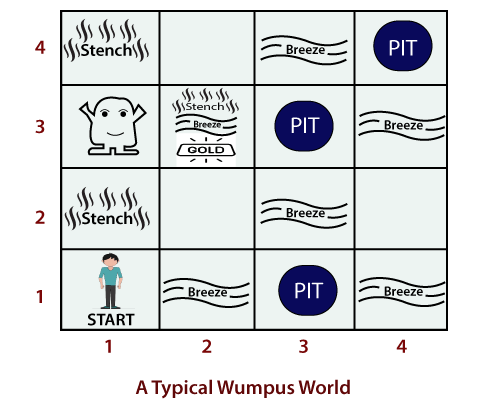

+1000 for the gold,

-1000 death ,

-1 move.

-10 move to pit.

0 can't move to room (not adjacent).

Initial State S0 : where Agent standing (S8 the wumpus,S9 gold ..).

In [24]:
import numpy as np
import pandas as pd
import random

In [25]:
rewards=np.array([
    [0,-1,0,0,-1,0,0,0,0,0,0,0,0,0,0,0],
    [-1,0,-10,0,0,-1,0,0,0,0,0,0,0,0,0,0],
    [0,-1,0,-1,0,0,-1,0,0,0,0,0,0,0,0,0],
    [0,0,-10,0,0,0,0,-1,0,0,0,0,0,0,0,0],
    [-1,0,0,0,0,-1,0,0,-1000,0,0,0,0,0,0,0],
    [0,-1,0,0,-1,0,0,0,0,1000,0,0,0,0,0,0],
    [0,0,-10,0,0,-1,0,-1,0,0,-10,0,0,0,0,0],
    [0,0,0,-1,0,0,-1,0,0,0,-1,0,0,0,0,0],
    [0,0,0,0,-1,0,0,0,0,1000,0,0,-1,0,0,0],
    [0,0,0,0,0,-1,0,0,-1000,0,-10,0,0,-1,0,0],
    [0,0,0,0,0,0,-1,0,0,1000,0,-1,0,0,-1,0],
    [0,0,0,0,0,0,0,-1,0,0,-10,0,0,0,0,-10],
    [0,0,0,0,0,0,0,0,-1000,0,0,0,0,-1,0,0],
    [0,0,0,0,0,0,0,0,0,1000,0,0,-1,0,-1,0],
    [0,0,0,0,0,0,0,0,0,0,-10,0,0,-1,0,-10],
    [0,0,0,0,0,0,0,0,0,0,0,-1,0,0,-1,0]])

In [26]:
#using pandas to display purposes
pd.DataFrame(rewards)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,-1,0,0,-1,0,0,0,0,0,0,0,0,0,0,0
1,-1,0,-10,0,0,-1,0,0,0,0,0,0,0,0,0,0
2,0,-1,0,-1,0,0,-1,0,0,0,0,0,0,0,0,0
3,0,0,-10,0,0,0,0,-1,0,0,0,0,0,0,0,0
4,-1,0,0,0,0,-1,0,0,-1000,0,0,0,0,0,0,0
5,0,-1,0,0,-1,0,0,0,0,1000,0,0,0,0,0,0
6,0,0,-10,0,0,-1,0,-1,0,0,-10,0,0,0,0,0
7,0,0,0,-1,0,0,-1,0,0,0,-1,0,0,0,0,0
8,0,0,0,0,-1,0,0,0,0,1000,0,0,-1,0,0,0
9,0,0,0,0,0,-1,0,0,-1000,0,-10,0,0,-1,0,0


In [27]:
def intialize_q(m,n):
    return np.zeros((m,n))
q_matrix=intialize_q(16,16)
pd.DataFrame(q_matrix)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
def set_initial_state(state=4):
    return np.random.randint(0,state)

In [29]:
def get_action(current_state, reward_matrix):
    valid_actions=[]
    for action in enumerate(reward_matrix[current_state]):
        if action [1] !=0:
            valid_actions+=[action[0]]
    return random.choice(valid_actions)

In [30]:
# To take some action, we need to know the current state
def take_action(current_state, reward_matrix, gamma, verbose=False):
    action= get_action(current_state, reward_matrix)
    sa_reward= reward_matrix[current_state, action] # current_state-action reward
    ns_reward= max(q_matrix[action,])# next state-action reward
    q_current_state= sa_reward+(gamma*ns_reward)
    q_matrix[current_state, action]=q_current_state #matutes q_matrix
    new_state= action
    if verbose:
        print(q_matrix)
        print(f"Old State: {current_state} | New State: {new_state}\n\n")
        if new_state== 9:
            print(f"Agent has reached it's goal!")
    return new_state

In [31]:
def initialize_episode(reward_matrix, initial_state, gamma, verbose=False):
    #Runs 1 episode unitl the agent reaches its goal-state
    current_state = initial_state
    while True: #we dont use current_state==7
        current_state= take_action(current_state, reward_matrix, gamma, verbose)
        if current_state ==0:
            break

In [32]:
def train_agent(iteration, reward_matrix, gamma, verbose=False):
    #Runs a given number of episodes then normalizs the matrix
    print("Training in progress...")
    for episode in range(iteration):
        initial_state =set_initial_state()
        initialize_episode(reward_matrix, initial_state, gamma, verbose)
    print("Training complete!")
    return q_matrix


In [33]:
def normalize_matrix(q_matrix):
    normalize_q=q_matrix/max(q_matrix[q_matrix.nonzero()])*100
    return normalize_q.astype(int)

In [34]:
# Test run of single episode....
gamma=0.1
initial_state=0
initial_action=get_action(initial_state, rewards)
initialize_episode(rewards, initial_state, gamma, True)
print(q_matrix)


[[ 0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 

In [35]:
#Test run of full training
gamma=0.8
initial_state=set_initial_state()
initial_action=get_action(initial_state, rewards)
q_table=train_agent(2000, rewards, gamma, False)
print(pd.DataFrame(q_table))

Training in progress...
Training complete!
             0            1            2            3            4   \
0      0.000000  1774.555556     0.000000     0.000000  1774.555556   
1   1418.644444     0.000000  1409.644444     0.000000     0.000000   
2      0.000000  1774.555556     0.000000  1418.644444     0.000000   
3      0.000000     0.000000  1409.644444     0.000000     0.000000   
4   1418.644444     0.000000     0.000000     0.000000     0.000000   
5      0.000000  1774.555556     0.000000     0.000000  1774.555556   
6      0.000000     0.000000  1409.644444     0.000000     0.000000   
7      0.000000     0.000000     0.000000  1418.644444     0.000000   
8      0.000000     0.000000     0.000000     0.000000  1774.555556   
9      0.000000     0.000000     0.000000     0.000000     0.000000   
10     0.000000     0.000000     0.000000     0.000000     0.000000   
11     0.000000     0.000000     0.000000     0.000000     0.000000   
12     0.000000     0.000000     0

In [36]:
#In DataFrame for display purposes
pd.DataFrame(normalize_matrix(q_table))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,63,0,0,63,0,0,0,0,0,0,0,0,0,0,0
1,51,0,50,0,0,79,0,0,0,0,0,0,0,0,0,0
2,0,63,0,51,0,0,63,0,0,0,0,0,0,0,0,0
3,0,0,50,0,0,0,0,63,0,0,0,0,0,0,0,0
4,51,0,0,0,0,79,0,0,43,0,0,0,0,0,0,0
5,0,63,0,0,63,0,0,0,0,100,0,0,0,0,0,0
6,0,0,50,0,0,79,0,63,0,0,79,0,0,0,0,0
7,0,0,0,51,0,0,63,0,0,0,79,0,0,0,0,0
8,0,0,0,0,63,0,0,0,0,100,0,0,63,0,0,0
9,0,0,0,0,0,79,0,0,43,0,79,0,0,79,0,0
